In [ ]:
!pip install -q kaggle
from google.colab import files

files.upload()

! mkdir ~/.kaggle
! mv kaggle.json ~/.kaggle

! kaggle competitions download -c titanic

! mkdir data
! unzip titanic.zip -d data
! rm titanic.zip

Saving kaggle.json to kaggle.json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 8.16MB/s]
mkdir: cannot create directory ‘data’: File exists
Archive:  titanic.zip
replace data/gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data/gender_submission.csv  
replace data/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data/test.csv           
replace data/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data/train.csv          


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

train_df = pd.read_csv(r'data/train.csv')
test_df = pd.read_csv(r'data/test.csv')
comb_df = pd.concat([train_df, test_df])

In [ ]:
train_df.head()
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
comb_df.info()

In [ ]:
comb_df.hist(bins=50, figsize=(15,10))
plt.show()

In [ ]:
comb_df.describe()

In [ ]:
comb_df.describe(include='O')

In [ ]:
def plot_data(df, plot_type: 'dist' or 'hist' or 'box' or 'count', *column_names):
  plt.figure(figsize=(10, 6))
  if len(column_names) == 1:
    column_name = column_names[0]
    if plot_type == 'dist':
      sns.distplot(df[column_name], color='r')
      plt.title(f'{column_name} Distribution',size=18)
      plt.xlabel(column_name,size=14)
      plt.ylabel('Density',size=14)
    elif plot_type == 'hist':
      sns.histplot(df[column_name], color='r')
      plt.title(f'{column_name} Distribution')
      plt.xlabel(column_name,size=14)
      plt.ylabel('Count',size=14)
    elif plot_type == 'box':
      sns.boxplot(data=df, x=column_name)
      plt.title(f'{column_name} Distribution')
    elif plot_type == 'count':
      sns.countplot(data=df, x=column_name)
      plt.xlabel(column_name, size=14)
    else:
      print('Invalid plot_type')
      return
  elif len(column_names) == 2:
    c_dict = {k:v for k, v in zip(['x', 'y'], column_names)}
    if plot_type == 'scatter':
      sns.scatterplot(data=df, **c_dict)
      plt.title(f'{" vs ".join(column_names)}')
      plt.xlabel(column_names[0], size=14)
      plt.ylabel(column_names[1], size=14)
    elif plot_type == 'box':
      sns.set_style('darkgrid')
      sns.boxplot(data=df, **c_dict)
      plt.title(f'{" vs ".join(column_names)}')
  else:
    if plot_type == 'pair':
      sns.pairplot(df, markers='+', diag_kind='kde', kind='reg',
                   plot_kws={'line_kws':{'color':'#aec6cf'}, 'scatter_kws': {'alpha': 0.7, 'color': 'red'}},
                   corner=True)

  plt.show()


def remove_outliers(df):
  pass

In [ ]:
def print_frequency(df, column_name, count=10):
  data = df[column_name]
  vc = data.value_counts().sort_values(ascending=False)
  for i, (v, c) in enumerate(vc.items()):
    if i == count:
      break
    print(f'{i}.\t {v}: {c}')

In [ ]:
less_than_100 = len(comb_df[comb_df['Fare'] <= 100])/len(comb_df['Fare'])
print(f'{less_than_100 * 100}% of values in Fare are <= 100')

93.5064935064935% of values in Fare are <= 100


<Figure size 1000x600 with 0 Axes>

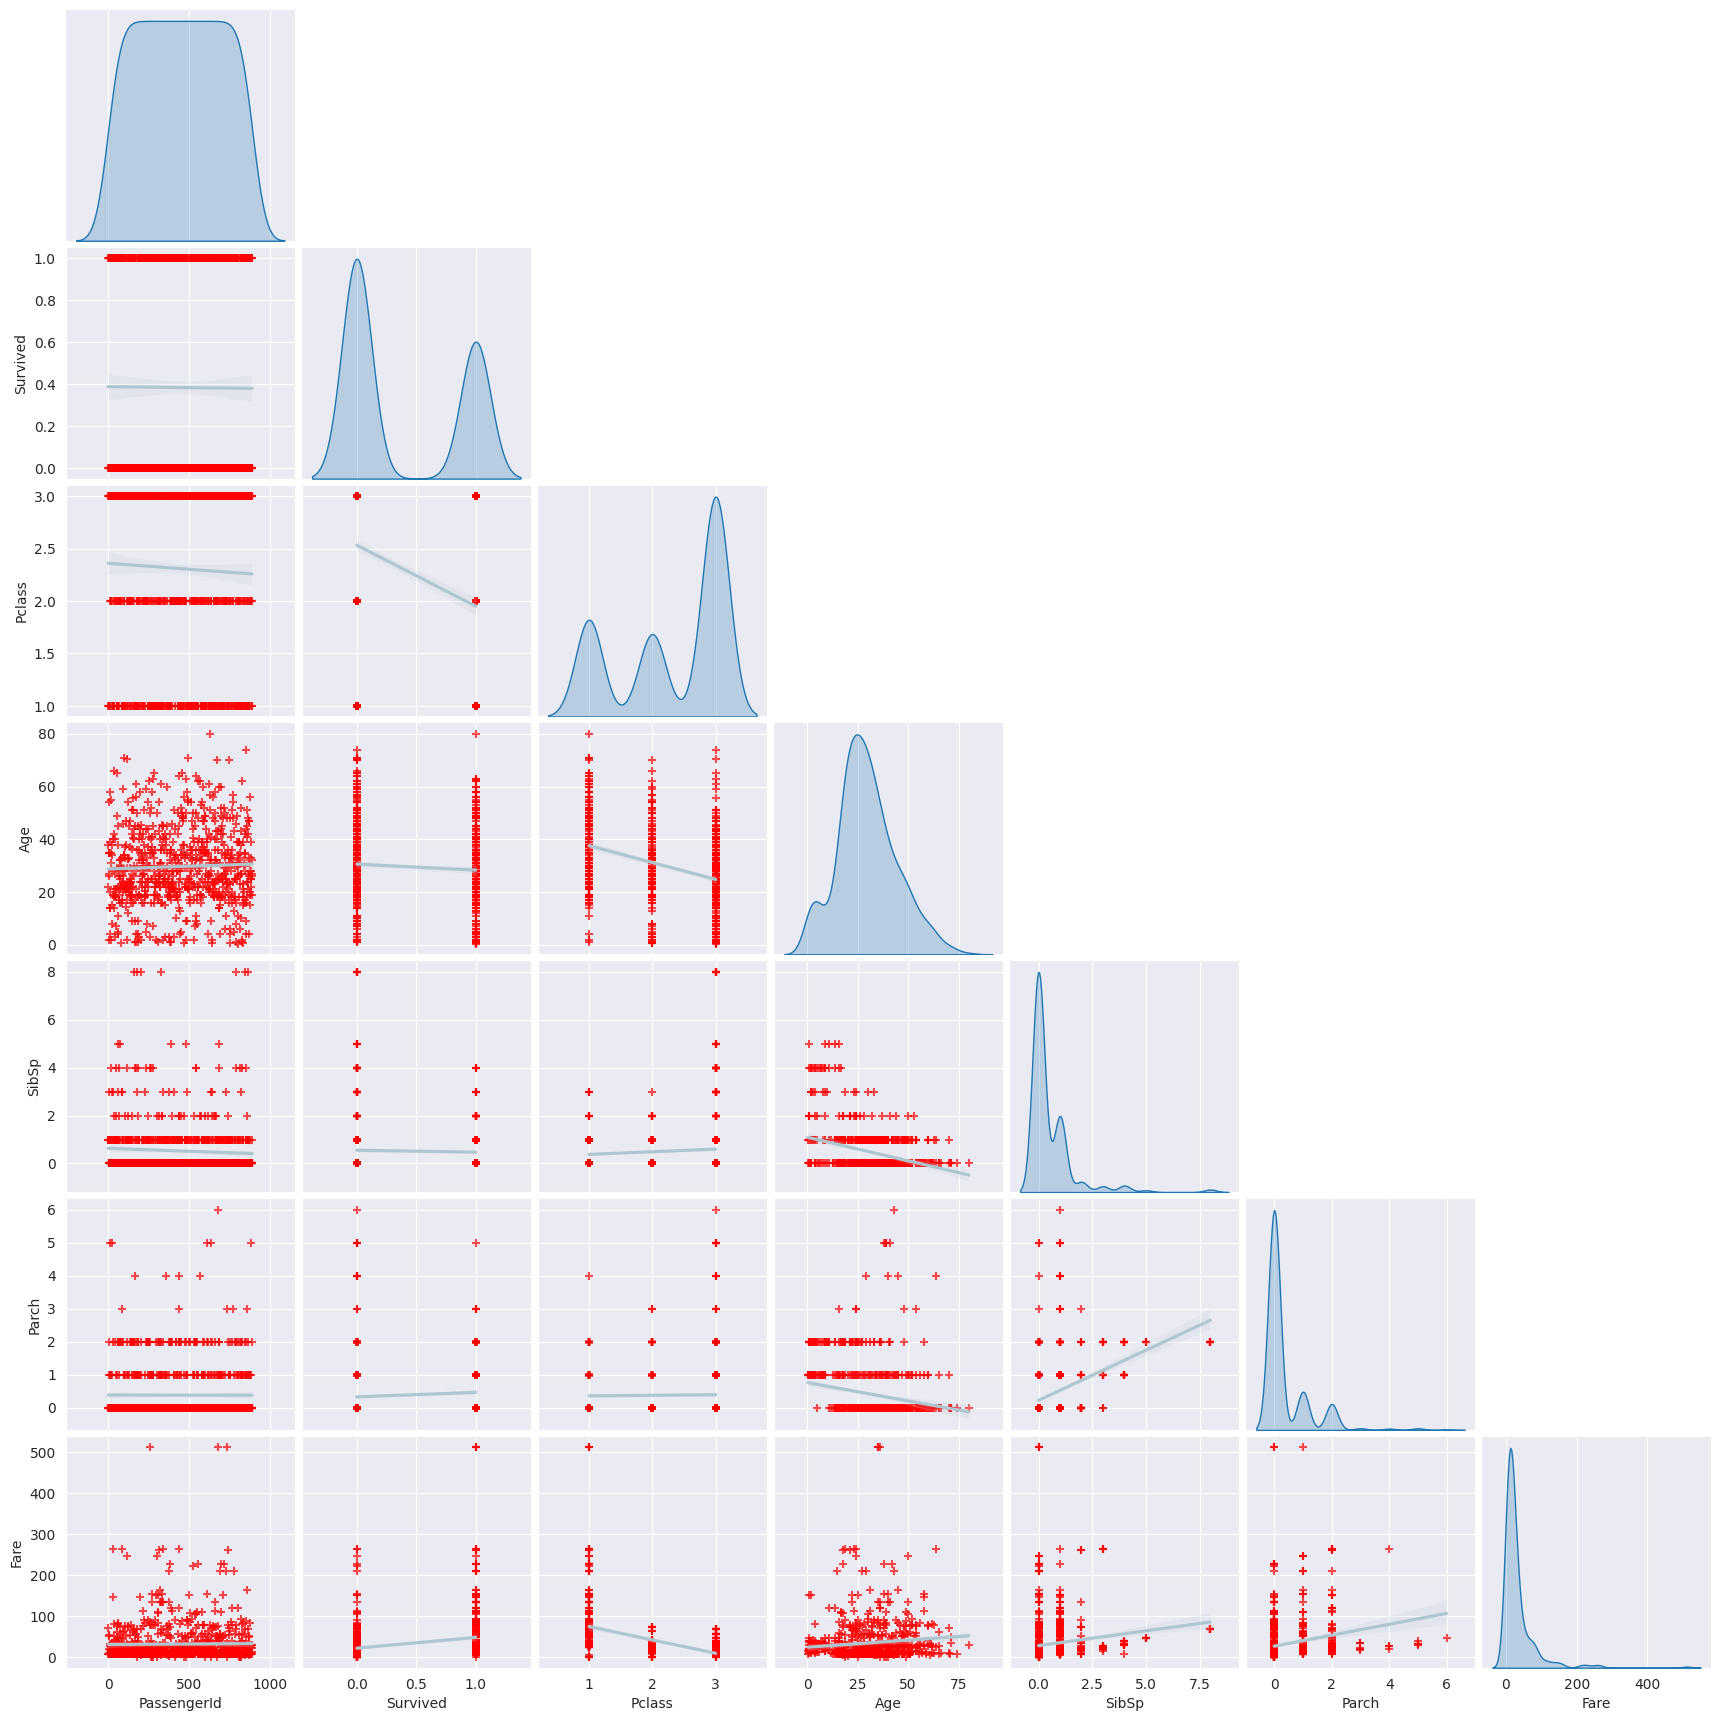

In [ ]:
plot_data(train_df, 'pair')

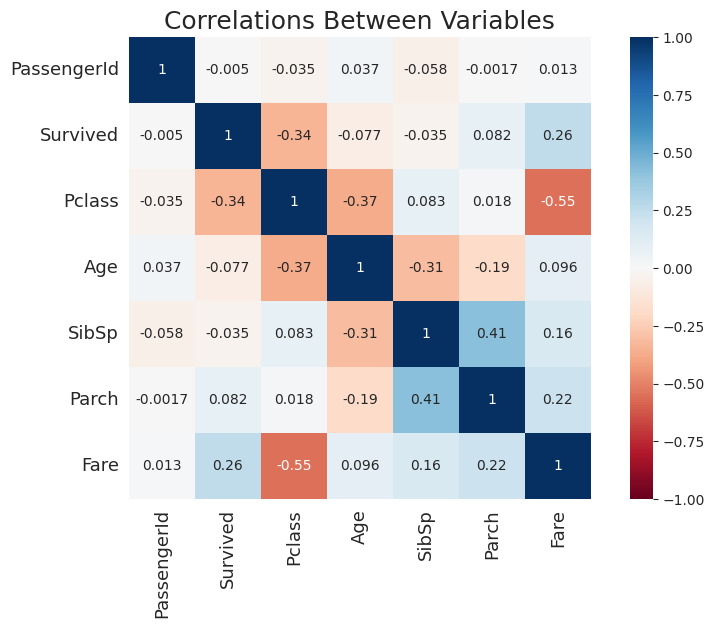

In [ ]:
plot_data(train_df, 'heatmap')

In [ ]:
from sklearn.model_selection import train_test_split

def process_df(df):
  df['Sex'] = df['Sex'].replace('male', 0).replace('female', 1)
  df.dropna(subset=['Embarked'], inplace=True)
  df['Age', 'Fare'].fillna(-1, inplace=True)
  for i, v in enumerate(df['Embarked'].unique()):
    df['Embarked'] = df['Embarked'].replace(v, i)

  columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
  if 'Survived' in df.columns:
    return df[columns], df['Survived']
  else: return df[columns], None
X, y = process_df(train_df)
print(X.head(10))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    0  22.0      1      0   7.2500         0
1       1    1  38.0      1      0  71.2833         1
2       3    1  26.0      0      0   7.9250         0
3       1    1  35.0      1      0  53.1000         0
4       3    0  35.0      0      0   8.0500         0
5       3    0  -1.0      0      0   8.4583         2
6       1    0  54.0      0      0  51.8625         0
7       3    0   2.0      3      1  21.0750         0
8       3    1  27.0      0      2  11.1333         0
9       2    1  14.0      1      0  30.0708         1


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

reg = LogisticRegression(random_state=42)
tree = DecisionTreeClassifier(random_state=42)
forest = RandomForestClassifier(n_estimators=100, random_state=42)

reg.fit(X_train, y_train)
tree.fit(X_train, y_train)
forest.fit(X_train, y_train)

reg_pred = reg.predict(X_test)
tree_pred = tree.predict(X_test)
forest_pred = forest.predict(X_test)

print(f'Logistic Regression: {accuracy_score(reg_pred, y_test)*100:.3f}%')
print(f'Decision Tree: {accuracy_score(tree_pred, y_test)*100:.3f}%')
print(f'Random Forest: {accuracy_score(forest_pred, y_test)*100:.3f}%')

Logistic Regression: 78.090%
Decision Tree: 75.843%
Random Forest: 76.966%


In [ ]:
test_df = pd.read_csv('data/test.csv')
X_train, y_train = process_df(df)
X_test, _ = process_df(test_df)

reg = LogisticRegression(random_state=42)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

df_to_write = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': y_pred})
df_to_write.to_csv('submission.csv', index=False)